In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [22]:
def get_normalize_data(data, scaled = 'min_max'):
    # NORMALIZANDO OS DADOS 
    normalize_data = pd.DataFrame()
    if scaled == 'max':
        for column in data.columns: 
            normalize_data[column] = data[column]  / data[column].abs().max() 
    else:    
        for column in data.columns: 
            normalize_data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())     
    return normalize_data


def split_train_data(data, predictive_label, apply_smote = True):

    X = data.drop(predictive_label, axis=1)
    y = data[predictive_label]
    
    if apply_smote:
        # SMOTE
        smote = SMOTE(random_state=32)
        X, y = smote.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=999
    )
    
    return X_train, X_test, y_train, y_test


def get_lazy_classifier_result(X_train, X_test, y_train, y_test):
    # Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=True)
    clf_models, clf_predictions = clf.fit(X_train, X_test, y_train, y_test)

    # Regressor
    reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
    reg_models, reg_predictions = reg.fit(X_train, X_test, y_train, y_test)

    return clf_models, clf_predictions, reg_models, reg_predictions

# Load synthetic data

In [23]:
# Visualize the proportion of borrowers
load_data = pd.read_csv("data\synthetic_conformity_data.csv")

load_data["conformity_class"] = np.where(
    load_data["conformity_class"] == "conforming", 1, 0
)

predictive_label = "conformity_class"

attributes = list(load_data.drop("conformity_class", axis=1).columns)
# pd.plotting.scatter_matrix(load_data[attributes], figsize=(10, 8))

<Axes: >

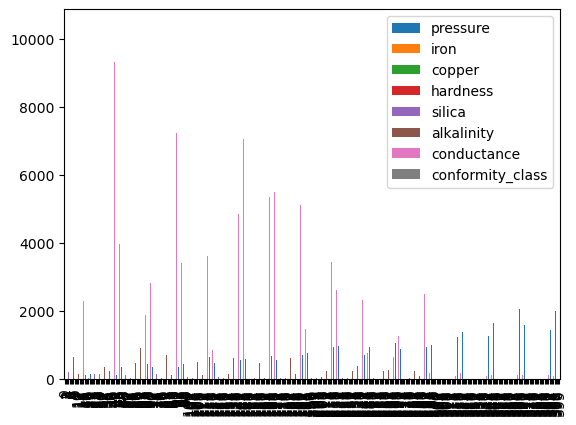

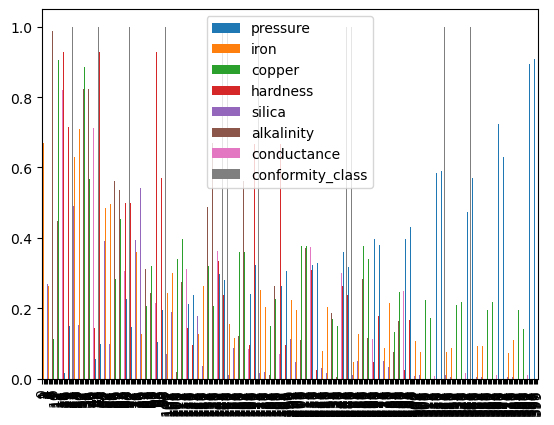

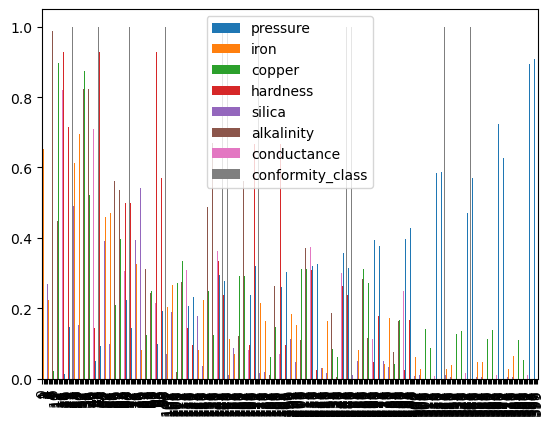

In [24]:
# Synthetic data
load_data.plot(kind = 'bar')

# Synthetic normalized data
get_normalize_data(load_data, scaled = 'max').plot(kind = 'bar')
get_normalize_data(load_data, scaled = 'min_max').plot(kind = 'bar')

# Tests

In [25]:
# TESTE 1: Synthetic data

X_train, X_test, y_train, y_test = split_train_data(
    load_data, predictive_label, apply_smote=False
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
# display(clf_models)

# Linear regression machine learning models
# display(reg_models)

clf_models.to_csv("data_train_test\\test_1_clf_models.csv", index=True)
reg_models.to_csv("data_train_test\\test_1_reg_models.csv", index=False)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 20.88it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.11it/s]


In [26]:
# TESTE 2: Synthetic data with SMOTE function

X_train, X_test, y_train, y_test = split_train_data(
    load_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
# display(clf_models)

# Linear regression machine learning models
# display(reg_models)

clf_models.to_csv("data_train_test\\test_2_clf_models.csv", index=True)
reg_models.to_csv("data_train_test\\test_2_reg_models.csv", index=False)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 19.47it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.07it/s]


In [27]:
# TESTE 3: Synthetic normalized data (max_scaled) without SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=False
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
# display(clf_models)

# Linear regression machine learning models
# display(reg_models)

clf_models.to_csv("data_train_test\\test_3_clf_models.csv", index=True)
reg_models.to_csv("data_train_test\\test_3_reg_models.csv", index=False)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 20.28it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 15.20it/s]


In [28]:
# TESTE 4: Synthetic normalized data (max_scaled) with SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
# display(clf_models)

# Linear regression machine learning models
# display(reg_models)
clf_models.to_csv("data_train_test\\test_4_clf_models.csv", index=True)
reg_models.to_csv("data_train_test\\test_4_reg_models.csv", index=False)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 18.65it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.05it/s]


In [29]:
# TESTE 5: Synthetic normalized (min_max_scaled) data without SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
# display(clf_models)

# Linear regression machine learning models
# display(reg_models)
clf_models.to_csv("data_train_test\\test_5_clf_models.csv", index=True)
reg_models.to_csv("data_train_test\\test_5_reg_models.csv", index=False)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 19.77it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.11it/s]


In [30]:
# TESTE 6: Synthetic normalized (min_max_scaled) data with SMOTE function

normalize_data = get_normalize_data(load_data, scaled = 'min_max')

X_train, X_test, y_train, y_test = split_train_data(
    normalize_data, predictive_label, apply_smote=True
)
clf_models, clf_predictions, reg_models, reg_predictions = get_lazy_classifier_result(
    X_train, X_test, y_train, y_test
)

# Categorical machine learning models
# display(clf_models)

# Linear regression machine learning models
# display(reg_models)

clf_models.to_csv("data_train_test\\test_6_clf_models.csv", index=True)
reg_models.to_csv("data_train_test\\test_6_reg_models.csv", index=False)

 24%|███████████████████▌                                                              | 10/42 [00:00<00:01, 19.67it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:04<00:00, 10.11it/s]
